In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import time

In [4]:
t1=time.time()
mnist_train_data_path='C:\\Users\\1-10\\Desktop\\python\\01_MNIST_Kaggle_data\\train.csv'

train=np.genfromtxt(mnist_train_data_path, delimiter=',', skip_header=1).astype(np.dtype('uint8'))
# np.genfromtxt - 파일로부터 배열 생성 / delimiter - 구분자 / skip_header=1 (정수까지 해당되는 라인까지 제거시켜 데이터를 입력받음)
t2=time.time()

print("Process Time: " + str(t2-t1))
print(train)

Process Time: 32.23891544342041
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [5]:
t1=time.time()
mnist_test_data_path='C:\\Users\\1-10\\Desktop\\python\\01_MNIST_Kaggle_data\\test.csv'

test=np.genfromtxt(mnist_test_data_path, delimiter=',', skip_header=1).astype(np.dtype('uint8'))
t2=time.time()

print("Process Time " + str(t2-t1))
print(test)

Process Time 13.657269716262817
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


#### 데이터 분리
* 받은 데이터가 실제 데이터가 의미하는 숫자(0~9) + 실제 데이터로 구성되어 있음
* 즉, 1개의 데이터의 값이 일렬로 시리얼로 들어가 있는데, 맨 앞의 값이 label이고, 그 뒤의 값이 실제 데이터에 관련된 것임
* 이를 통해서 라벨 + 데이터로 구분

In [7]:
train_data=train[:,1:] # 컬럼 784개로 존재할 것 # train의 문제지
train_labels=train[:,0] # 1번째 컬럼은 라벨로 존재 # train의 정답지 

In [8]:
print(train_data)
print(train_labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


#### 0~9까지 데이터가 다 들어있는지 확인
* 실제로 우리가 학습시킬 데이터가 0~9까지 다 제대로 들어있는 데이터인지 확인

In [9]:
print(np.unique(train_labels)) # np.unique 중복되는 데이터 제거

[0 1 2 3 4 5 6 7 8 9]


#### 학습시키려는 데이터의 분포가 균일하게 적당히 분포되었는지 확인

In [10]:
# method 01) numpy의 unique 이용해서 처리
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


In [11]:
import seaborn as sns

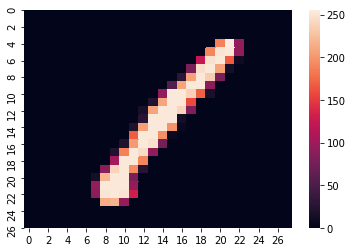

In [12]:
# 보고자 하는 데이터의 index
idx=0
image_data=train_data[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size=image_data.shape[0]
one_size=int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
#plt.title(str("MNIST Digit Image_ Train Data Number: ") + str(idx))

In [13]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [14]:
t1=time.time()
# instantiate learning model ( k=3 ) -> train data 57500개 전체를 학습

# n_jobs = -1 하지 않으면 시간이 많이 걸리게 된다
knn=KNeighborsClassifier(n_neighbors=5, n_jobs=-1) # n_neighbors의 디폴트 값은 5

# fitting the model - 모델 학습
knn.fit(train_data, train_labels)

# predict the model - 예측
pred=knn.predict(test)

t2=time.time()
print("Process Time : " + str(t2-t1))

Process Time : 225.32524371147156


In [13]:
# 출력용 만들기
img_id=[]
# summit 관련해서는 id가 1부터 시작되어야 하니 index matching 부분임
for i in range(1,len(test)+1):
    img_id.append(i)

predMNIST=pd.DataFrame({"ImageId":img_id, "Label":pred})

# outpath
out_path="C:\\Users\\1-10\\Desktop\\python\\01_MNIST_Kaggle_data\\out1211.csv"
predMNIST.to_csv(out_path, index=False) # 인덱스에 대한 정보는 출력하지 않는다

#### 실제로 kaggle에 summit하기
* https://www.kaggle.com/c/digit-recognizer/leaderboard

In [15]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

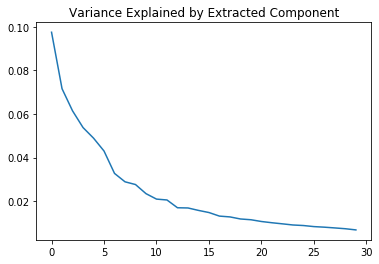

(42000, 30)
(28000, 30)


array([0.97273376, 0.97057983, 0.97243645, 0.96870982, 0.96941109,
       0.97198399])

In [36]:
from sklearn.decomposition import PCA

num_comp=30
pca=PCA(n_components=num_comp)

pca.fit(train_data)

# determine amount of variance explained by components
np.sum(pca.explained_variance_ratio_)

# plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Component')
plt.show()

# extract the features
train_ext=pca.fit_transform(train_data) # 특정행렬을 낮은 차원의 근사행렬로 변환
print(train_ext.shape)

# transform the test data using the existing parameters
test_ext=pca.transform(test)
print(test_ext.shape)

min_max_scaler=MinMaxScaler()

train_norm=min_max_scaler.fit_transform(train_ext)
test_norm=min_max_scaler.fit_transform(test_ext)

knn=KNeighborsClassifier()
knn.fit(train_norm, train_labels)

from sklearn.model_selection import cross_val_score

# 시간 오래 걸림
cross_val_score(knn,train_norm,train_labels, cv=6) # model, train, target, cross validation

In [37]:
t1=time.time()

knn=KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# fitting the model - 모델 학습
knn.fit(train_norm, train_labels)

# predict the model - 예측
pred=knn.predict(test_norm)

t2=time.time()
print("Process Time : " + str(t2-t1))

Process Time : 10.264209508895874


In [38]:
# 출력용 만들기
img_id=[]
# summit 관련해서는 id가 1부터 시작되어야 하니 index matching 부분임
for i in range(1,len(test_norm)+1):
    img_id.append(i)

predMNIST=pd.DataFrame({"ImageId":img_id, "Label":pred})

# outpath
out_path="C:\\Users\\1-10\\Desktop\\python\\01_MNIST_Kaggle_data\\out21.csv"
predMNIST.to_csv(out_path, index=False) # 인덱스에 대한 정보는 출력하지 않는다